# MLP

In [1]:
# CONTEXT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# IMPORTING THE UTILS FOR MANIPULATE THE DATASET
import sys
sys.path.append('../Classifiers/')
from dataset_utils import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
# For the tuning of Neural Network
from itertools import product

# Setting the min and max neurons for each level (Warning: higher interval == higher time for getting the stats )
min_neurons=9
max_neurons=16

# Combination of the neurons in the first and second layer (repeat parameter is the number of hidden layers)
comb_neurons=list(map(list, product(range(min_neurons, max_neurons), repeat=2)))

# Uncomment the following line for better understanding
print(comb_neurons)

# Convert the list in list of string labels for use them in plotting of the data
comb_string=list()

for sublist in comb_neurons:
    for elem in sublist:
        elem=list(map(str,sublist))
        str_elem='-'.join(elem)
    comb_string.append(str_elem)
        

[[9, 9], [9, 10], [9, 11], [9, 12], [9, 13], [9, 14], [9, 15], [10, 9], [10, 10], [10, 11], [10, 12], [10, 13], [10, 14], [10, 15], [11, 9], [11, 10], [11, 11], [11, 12], [11, 13], [11, 14], [11, 15], [12, 9], [12, 10], [12, 11], [12, 12], [12, 13], [12, 14], [12, 15], [13, 9], [13, 10], [13, 11], [13, 12], [13, 13], [13, 14], [13, 15], [14, 9], [14, 10], [14, 11], [14, 12], [14, 13], [14, 14], [14, 15], [15, 9], [15, 10], [15, 11], [15, 12], [15, 13], [15, 14], [15, 15]]


Import the dataset and generate the one we'll use for the classification with the fake and the real users

In [5]:
# IMPORT THE ORIGINAL DATASET
df_real = pd.read_csv('../../data/balanced_real_data.csv')
df_fake = pd.read_csv('../../data/balanced_fake_data.csv')
dataset=pd.concat([df_real,df_fake],ignore_index=True)
dataset=fix_private_entries(dataset)

In [6]:
dataset.head(10)

,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,is_joined_recently,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,True,45,2979,846,0.283988,278,False,False,False,False,...,4.964205,2.464333e+01,1.759163,1.688451e+06,7930005.0,75731.0,1.964306e+06,3.858496e+12,1.947676,True
1,True,131,966,5172,5.354037,150,False,False,True,False,...,0.472582,2.233333e-01,2.951336,1.978352e+05,851011.0,3855.0,2.222041e+05,4.937467e+10,1.785389,True
2,True,128,1662,1475,0.887485,403,False,False,True,False,...,5.961543,3.554000e+01,1.546427,2.950338e+05,1128895.0,9212.0,2.417832e+05,5.845911e+10,1.726161,True
3,True,0,236,111,0.470339,43,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,True,16,386,967516,2506.518135,34,False,True,True,False,...,1180.090381,1.392613e+06,0.319856,2.418942e+06,12726352.0,36.0,2.814164e+06,7.919517e+12,2.273966,True
5,True,103,2544,1652183,649.443003,9670,False,True,False,False,...,49.513466,2.451583e+03,1.172048,7.948950e+04,287585.0,5895.0,7.382074e+04,5.449502e+09,1.315021,True
6,True,150,410,70481,171.904878,2459,False,False,True,False,...,82.691253,6.837843e+03,0.989691,3.742878e+05,827086.0,86472.0,2.019481e+05,4.078303e+10,0.286078,True
7,True,15,1269,1311,1.033097,24,False,False,True,False,...,1.742479,3.036232e+00,0.746906,4.613034e+06,24784763.0,433680.0,5.338513e+06,2.849972e+13,2.462336,True
8,True,0,755,2959,3.919205,225,False,False,True,False,...,4.325506,1.871000e+01,1.069453,1.003002e+05,413788.0,16256.0,8.768568e+04,7.688778e+09,2.289149,True
9,True,116,336,1693459,5040.056548,4214,False,True,True,False,...,153.991472,2.371337e+04,2.851830,5.910004e+04,278030.0,1313.0,7.192136e+04,5.172681e+09,2.133841,True


In [7]:
# TAKE THE TRAINSET AND THE TARGET FROM DATASET
trainset=get_trainset(dataset)
targets=get_target_dataset(dataset)

# Classification without the Statistics from the Media of the Users 

In [8]:
# DELETING THE STATISTICS OF THE USERS CONTENTS
trainset_without_stats=drop_stats(trainset)

In [9]:
trainset_without_stats=StandardScale_dataset(trainset_without_stats)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(trainset_without_stats, targets, test_size = 0.2, random_state = 12345)
mlp = MLPClassifier(hidden_layer_sizes=([10,13]),max_iter=500)
mlp.fit(x_train, y_train)
predictions = mlp.predict(x_test)

# Confusion Matrix 

In [11]:
print(confusion_matrix(y_test, predictions))


[[1381  180]
 [ 182 1319]]


# Classification Report

In [12]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.88      0.88      0.88      1561
        True       0.88      0.88      0.88      1501

    accuracy                           0.88      3062
   macro avg       0.88      0.88      0.88      3062
weighted avg       0.88      0.88      0.88      3062



# Tuning the Neural Network

In [13]:
err = []

for i in comb_neurons:
    
    mlp = MLPClassifier(hidden_layer_sizes=(i),max_iter=500)
    mlp.fit(x_train, y_train)
    pred_i  = mlp.predict(x_test)
    err.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasso di errore')

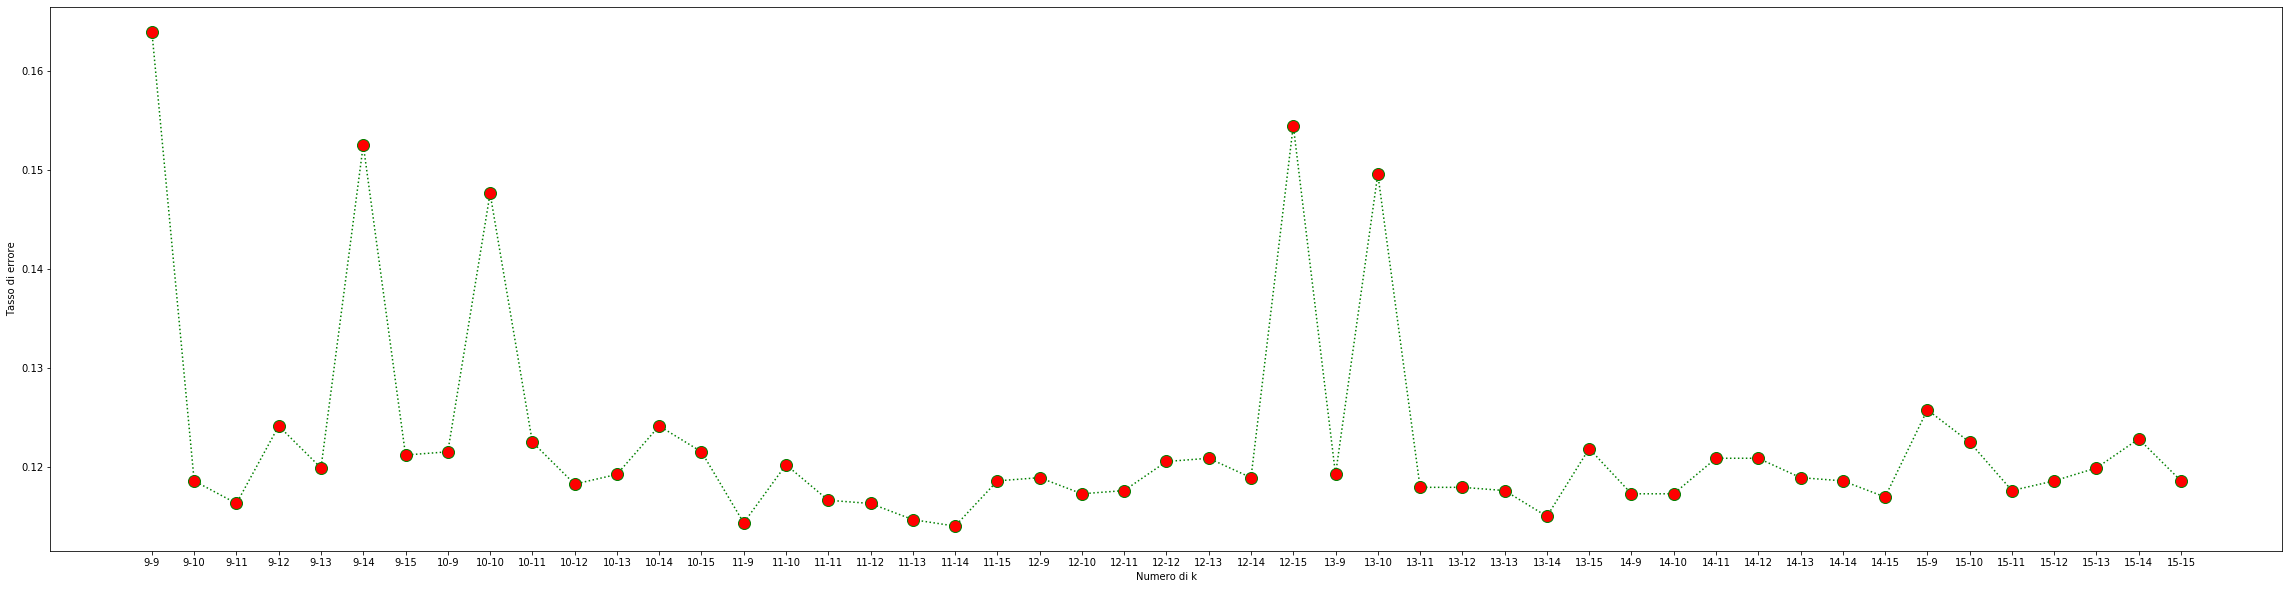

In [14]:
plt.figure(figsize=(40, 10))
plt.plot(comb_string, err, color='green', linestyle='dotted', marker='o',
         markerfacecolor='red', markersize=12)
plt.xlabel('Numero di k')
plt.ylabel('Tasso di errore')

# Classification with only Public Profile (with Media Stats)

In [15]:
# CLASSIFICATION OF ONLY PUBLIC PROFILES
dataset_publics=drop_NaN_entries(dataset)
trainset_publics=get_trainset(dataset_publics)
targets_publics=get_target_dataset(dataset_publics)

In [16]:
trainset_publics=StandardScale_dataset(trainset_publics)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(trainset_publics, targets_publics, test_size = 0.2, random_state = 12345)
mlp = MLPClassifier(hidden_layer_sizes=([8,8]),max_iter=500)
mlp.fit(x_train, y_train)
predictions = mlp.predict(x_test)

# Confusion Matrix 

In [18]:
print(confusion_matrix(y_test, predictions))

[[1057   96]
 [ 103 1036]]


# Classification Report

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.91      0.92      0.91      1153
        True       0.92      0.91      0.91      1139

    accuracy                           0.91      2292
   macro avg       0.91      0.91      0.91      2292
weighted avg       0.91      0.91      0.91      2292



# Tuning the Neural Network

In [ ]:
err = []

for i in comb_neurons:
    
    mlp = MLPClassifier(hidden_layer_sizes=(i),max_iter=500)
    mlp.fit(x_train, y_train)
    pred_i  = mlp.predict(x_test)
    err.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(40, 10))
plt.plot(comb_string, err, color='green', linestyle='dotted', marker='o',
         markerfacecolor='red', markersize=12)
plt.xlabel('Numero di k')
plt.ylabel('Tasso di errore')

# Classification with NaN Values replaced with Median

In [ ]:
# CLASSIFICATION WITH NaN VALUES REPLACED WITH STATISTICS
dataset_median=fill_NaN_median(dataset)
trainset_median=get_trainset(dataset_median)
targets_median=get_target_dataset(dataset_median)
print(dataset_median.shape)

In [ ]:
trainset_median=StandardScale_dataset(trainset_median)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(trainset_median, targets_median, test_size = 0.2, random_state = 12345)
mlp = MLPClassifier(hidden_layer_sizes=([8,8]),max_iter=500)
mlp.fit(x_train, y_train)
predictions = mlp.predict(x_test)

# Confusion Matrix 

In [ ]:
print(confusion_matrix(y_test, predictions))

# Classification Report

In [ ]:
print(classification_report(y_test, predictions))

# Tuning the Neural Network

In [ ]:
err = []

for i in comb_neurons:
    
    mlp = MLPClassifier(hidden_layer_sizes=(i),max_iter=500)
    mlp.fit(x_train, y_train)
    pred_i  = mlp.predict(x_test)
    err.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(40, 10))
plt.plot(comb_string, err, color='green', linestyle='dotted', marker='o',
         markerfacecolor='red', markersize=12)
plt.xlabel('Numero di k')
plt.ylabel('Tasso di errore')